# Stock Market Prediction and Forecasting using Stacked LSTM

## *By:* **Harshita Aswani**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com//mwitiderrick//stockprice//master//NSE-TATAGLOBAL.csv')

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.shape

(2035, 8)

In [8]:
df.size

16280

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
df.duplicated().value_counts()

False    2035
dtype: int64

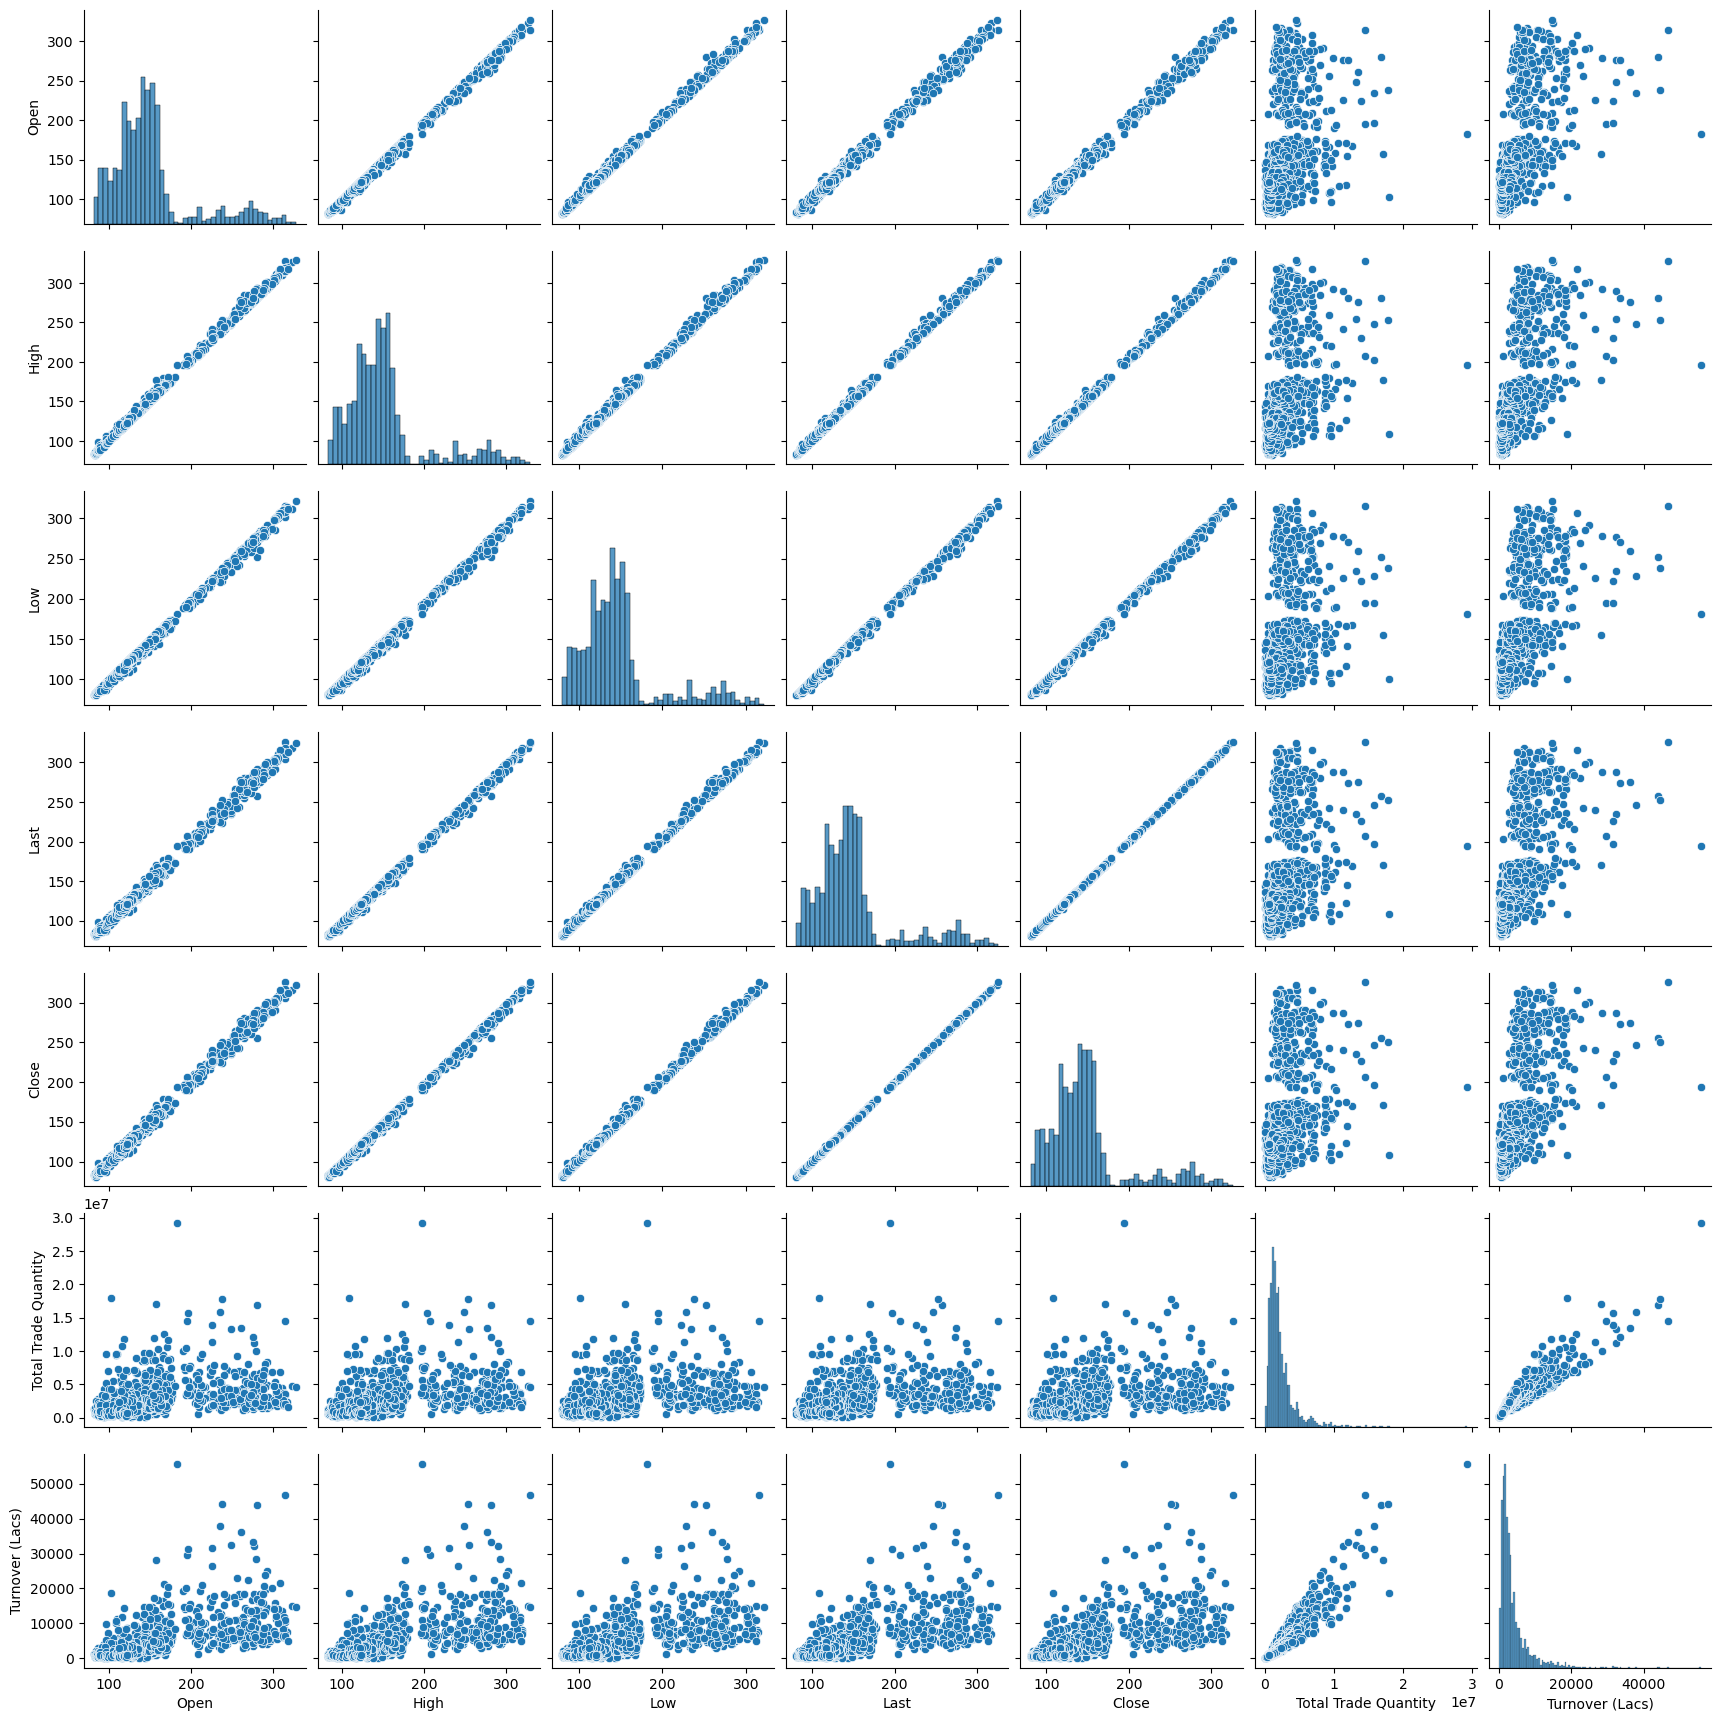

In [14]:
sns.pairplot(df)
plt.show()

In [21]:
df1 = df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

In [24]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [59]:
train_size = int(len(df1)*0.65)
train_size

1322

In [60]:
test_size = len(df1)-train_size
test_size

713

In [61]:
train_data, test_data = df1[0:train_size, : ], df1[train_size:len(df1), :1]

In [62]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [63]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

In [85]:
# converting an array of values into a dataset values
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [86]:
time_step = 250
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [87]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.51000817, 0.49918301,
        0.48059641],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.49918301, 0.48059641,
        0.50531046],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.48059641, 0.50531046,
        0.47263072],
       ...,
       [0.28329248, 0.27185458, 0.27839052, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.27185458, 0.27839052, 0.27757353, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.27839052, 0.27757353, 0.30759804, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [88]:
y_train

array([0.50531046, 0.47263072, 0.49101307, ..., 0.27389706, 0.25347222,
       0.26041667])

In [89]:
X_test

array([[0.24652778, 0.23611111, 0.25204248, ..., 0.1186683 , 0.12316176,
        0.11029412],
       [0.23611111, 0.25204248, 0.25919118, ..., 0.12316176, 0.11029412,
        0.11703431],
       [0.25204248, 0.25919118, 0.25776144, ..., 0.11029412, 0.11703431,
        0.11008987],
       ...,
       [0.0747549 , 0.08169935, 0.08925654, ..., 0.14562908, 0.15236928,
        0.15400327],
       [0.08169935, 0.08925654, 0.09068627, ..., 0.15236928, 0.15400327,
        0.14971405],
       [0.08925654, 0.09068627, 0.08129085, ..., 0.15400327, 0.14971405,
        0.1621732 ]])

In [90]:
y_test

array([0.11703431, 0.11008987, 0.1064134 , 0.10559641, 0.1004902 ,
       0.10784314, 0.10988562, 0.09763072, 0.09027778, 0.1123366 ,
       0.12867647, 0.12071078, 0.13031046, 0.1439951 , 0.13664216,
       0.14910131, 0.15686275, 0.14685458, 0.14481209, 0.14195261,
       0.14093137, 0.14583333, 0.15339052, 0.14889706, 0.16646242,
       0.17585784, 0.15604575, 0.15522876, 0.15339052, 0.14644608,
       0.16441993, 0.15236928, 0.14889706, 0.14705882, 0.15012255,
       0.15522876, 0.14052288, 0.12826797, 0.11172386, 0.11805556,
       0.11887255, 0.11519608, 0.12969771, 0.12254902, 0.13786765,
       0.1313317 , 0.11744281, 0.13071895, 0.1431781 , 0.16115196,
       0.15175654, 0.14644608, 0.15216503, 0.1435866 , 0.13419118,
       0.1431781 , 0.16115196, 0.16176471, 0.17320261, 0.18218954,
       0.16237745, 0.13112745, 0.15931373, 0.15951797, 0.14808007,
       0.16278595, 0.15625   , 0.16319444, 0.16360294, 0.16278595,
       0.16544118, 0.15522876, 0.17197712, 0.1503268 , 0.13255

In [91]:
# reshape input into 3D[samples, time_step, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.51000817],
        [0.49918301],
        [0.48059641]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.49918301],
        [0.48059641],
        [0.50531046]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.48059641],
        [0.50531046],
        [0.47263072]],

       ...,

       [[0.28329248],
        [0.27185458],
        [0.27839052],
        ...,
        [0.2816585 ],
        [0.27001634],
        [0.26531863]],

       [[0.27185458],
        [0.27839052],
        [0.27757353],
        ...,
        [0.27001634],
        [0.26531863],
        [0.27389706]],

       [[0.27839052],
        [0.27757353],
        [0.30759804],
        ...,
        [0.26531863],
        [0.27389706],
        [0.25347222]]])

In [92]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test

array([[[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.1186683 ],
        [0.12316176],
        [0.11029412]],

       [[0.23611111],
        [0.25204248],
        [0.25919118],
        ...,
        [0.12316176],
        [0.11029412],
        [0.11703431]],

       [[0.25204248],
        [0.25919118],
        [0.25776144],
        ...,
        [0.11029412],
        [0.11703431],
        [0.11008987]],

       ...,

       [[0.0747549 ],
        [0.08169935],
        [0.08925654],
        ...,
        [0.14562908],
        [0.15236928],
        [0.15400327]],

       [[0.08169935],
        [0.08925654],
        [0.09068627],
        ...,
        [0.15236928],
        [0.15400327],
        [0.14971405]],

       [[0.08925654],
        [0.09068627],
        [0.08129085],
        ...,
        [0.15400327],
        [0.14971405],
        [0.1621732 ]]])

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [94]:
model = Sequential()
model

In [95]:
model.add(LSTM(50, return_sequences = True, input_shape = (250,1)))

In [96]:
model.add(LSTM(50, return_sequences = True))

In [97]:
model.add(LSTM(50))

In [98]:
model.add(Dense(1))

In [99]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 250, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 250, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=250, batch_size=64, verbose=1)

Epoch 1/250
17/17 [==============================] - 12s 498ms/step - loss: 0.0119 - val_loss: 0.0038
Epoch 2/250
17/17 [==============================] - 8s 468ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 3/250
17/17 [==============================] - 8s 485ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 4/250
17/17 [==============================] - 8s 469ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/250
17/17 [==============================] - 8s 473ms/step - loss: 9.1793e-04 - val_loss: 0.0012
Epoch 6/250
17/17 [==============================] - 8s 466ms/step - loss: 9.1188e-04 - val_loss: 0.0010
Epoch 7/250
17/17 [==============================] - 8s 472ms/step - loss: 8.9285e-04 - val_loss: 0.0012
Epoch 8/250
17/17 [==============================] - 8s 481ms/step - loss: 8.7152e-04 - val_loss: 0.0013
Epoch 9/250
17/17 [==============================] - 8s 485ms/step - loss: 8.4265e-04 - val_loss: 9.8294e-04
Epoch 10/250
17/17 [==============================] - 8s 488ms/ste

In [102]:
train_predict = model.predict(X_train)
train_predict

34/34 [==============================] - 3s 55ms/step


array([[0.47014245],
       [0.5041276 ],
       [0.45778626],
       ...,
       [0.26064962],
       [0.26829112],
       [0.25159407]], dtype=float32)

In [103]:
test_predict = model.predict(X_test)
test_predict

15/15 [==============================] - 1s 47ms/step


array([[0.11566794],
       [0.11618291],
       [0.11275421],
       [0.10891493],
       [0.10687716],
       [0.10330243],
       [0.10599463],
       [0.10897981],
       [0.10309091],
       [0.09547593],
       [0.1045818 ],
       [0.12015136],
       [0.12260687],
       [0.12795849],
       [0.13874006],
       [0.13860126],
       [0.14553528],
       [0.15372957],
       [0.14994001],
       [0.14612786],
       [0.14273545],
       [0.14094616],
       [0.14374189],
       [0.1501491 ],
       [0.14950329],
       [0.16050504],
       [0.17145172],
       [0.16069348],
       [0.15489265],
       [0.15189388],
       [0.14660281],
       [0.1572191 ],
       [0.15365316],
       [0.14910813],
       [0.14606375],
       [0.14723817],
       [0.1514998 ],
       [0.14324935],
       [0.13149422],
       [0.11665837],
       [0.11520509],
       [0.11653437],
       [0.11531901],
       [0.12357499],
       [0.12319134],
       [0.13182573],
       [0.13172196],
       [0.122

In [104]:
# transform train and test to original form
train_predict = scaler.inverse_transform(train_predict)
train_predict

array([[196.04086],
       [204.36044],
       [193.01608],
       ...,
       [144.75703],
       [146.62767],
       [142.54022]], dtype=float32)

In [105]:
test_predict = scaler.inverse_transform(test_predict)
test_predict

array([[109.26551 ],
       [109.39157 ],
       [108.55223 ],
       [107.61237 ],
       [107.113525],
       [106.238434],
       [106.897484],
       [107.62825 ],
       [106.18665 ],
       [104.3225  ],
       [106.55163 ],
       [110.363045],
       [110.964165],
       [112.27424 ],
       [114.91357 ],
       [114.879585],
       [116.577034],
       [118.58299 ],
       [117.65532 ],
       [116.7221  ],
       [115.89164 ],
       [115.45362 ],
       [116.13801 ],
       [117.706505],
       [117.54841 ],
       [120.24163 ],
       [122.92137 ],
       [120.28776 ],
       [118.86772 ],
       [118.13362 ],
       [116.83837 ],
       [119.43723 ],
       [118.56429 ],
       [117.45167 ],
       [116.706406],
       [116.993904],
       [118.03715 ],
       [116.01743 ],
       [113.139786],
       [109.507965],
       [109.15221 ],
       [109.47761 ],
       [109.18009 ],
       [111.20116 ],
       [111.10724 ],
       [113.22093 ],
       [113.19553 ],
       [110.8

In [106]:
import math

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
math.sqrt(mean_squared_error(y_train, train_predict))

144.54213299482115

In [109]:
math.sqrt(mean_squared_error(y_test, test_predict))

105.68165816908235

In [111]:
# shift train predictions for plotting
look_back = 250
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1: len(df1)-1, :] = test_predict

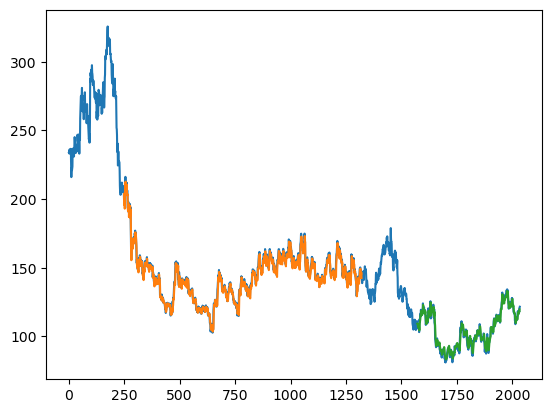

In [114]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Orange color is showing the train data

Green is showing the predicted data

Blue is showing the complete data